In [9]:
from pandas import read_csv
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [10]:
df = read_csv('international-airline-passengers.csv', usecols=[1])

In [11]:
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [12]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [14]:
values = df.values.astype('float32')

In [16]:
values.shape

(144, 1)

In [23]:
train_size = int(values.shape[0] * 0.67)
test_size = values.shape[0] - train_size

In [24]:
train = values[:train_size]
test = values[train_size:]

In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [30]:
def create_dataset(data, k):
    dataX, dataY = [], []
    for i in range(data.shape[0] - k):
        x = data[i: i+k,0]
        y = data[i+k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [33]:
look_back = 12
trainx, trainy = create_dataset(train, look_back)
testx, testy = create_dataset(test, look_back)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [38]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer = 'adam')
model.fit(trainx, trainy, epochs=10, batch_size=1)

Epoch 1/10
84/84 [==============================] - 3s 3ms/step - loss: 0.0729
Epoch 2/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 3/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 4/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0115
Epoch 5/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 6/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 7/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 8/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 9/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 10/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0101


In [39]:
testPredict = model.predict(testx)
testPredict = scaler.inverse_transform(testPredict).ravel()

2/2 [==============================] - 1s 4ms/step


In [40]:
trainPredict = model.predict(trainx)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

3/3 [==============================] - 0s 4ms/step


In [41]:
testTrue = scaler.inverse_transform([testy]).ravel()
trainTrue = scaler.inverse_transform([trainy]).ravel()

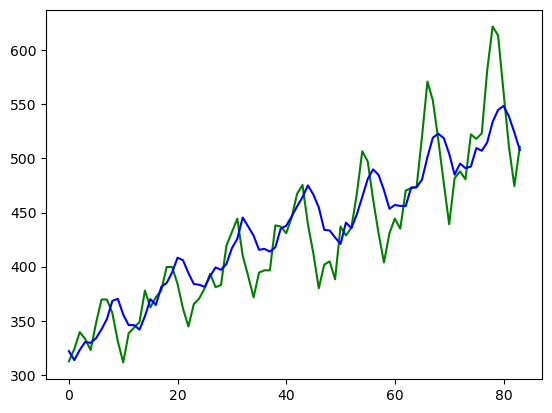

In [42]:
import matplotlib.pyplot as plt
plt.plot(trainTrue, c='g')
plt.plot(trainPredict, c='b')
plt.show()

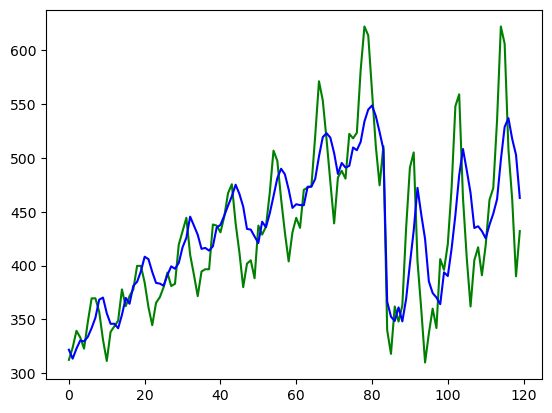

In [51]:
combinedPredict = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c='g')
plt.plot(combinedPredict, c='b')
plt.show()

In [48]:
trainPredict.shape

(84,)

In [47]:
testPredict.shape

(36,)